<a href="https://colab.research.google.com/github/Rafaelfyh/Challenge_DataScience/blob/main/modeling_alliar_noshow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from google.colab import drive
from datetime import date

Importando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


carregando dataframe

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Aliar projeto/dfpmodelo')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#7 Fazer one hot encoding das colunas categoricas 

In [6]:
df.columns


Index(['Unnamed: 0', 'id_pessoa', 'nome_procedimento', 'dt_exame',
       'media_valor', 'dias_entre_contato_exame', 'nome_unidade',
       'qde_falta_ate_dia_exame', 'idade', 'estado_civil', 'sexo',
       'grupo_economico', 'quarentena', '5digcep', 'show'],
      dtype='object')

##7.1 coluna ***nome_unidade***

In [7]:
unidade = pd.get_dummies(df['nome_unidade'])
for i in unidade.columns:
  df['nome_unidade_' + i] = unidade[i]
df.drop('nome_unidade',axis=1,inplace=True)

7.2 coluna nome_setor ou nome_procedimento

In [8]:
exame = pd.get_dummies(df['nome_procedimento'].astype(str))
for i in exame.columns:
  df['exame: ' + i] = exame[i]
df.drop('nome_procedimento',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
'''setor = pd.get_dummies(df['nome_setor'].astype(str))
for i in setor.columns:
  df['setor_' + i] = setor[i]
df.drop('nome_setor',axis=1,inplace=True)'''

"setor = pd.get_dummies(df['nome_setor'].astype(str))\nfor i in setor.columns:\n  df['setor_' + i] = setor[i]\ndf.drop('nome_setor',axis=1,inplace=True)"

7.3 coluna estado_civil

In [10]:
estadocivil = pd.get_dummies(df['estado_civil'].astype(str))
for i in estadocivil.columns:
  df['civil_' + i] = estadocivil[i]
df.drop('estado_civil',axis=1,inplace=True)

7.4 Coluna sexo

In [11]:
sexo = pd.get_dummies(df['sexo'].astype(str))
for i in sexo.columns:
  df['sexo_' + i] = sexo[i]
df.drop('sexo',axis=1,inplace=True)

7.5 Colina grupo_economico

In [12]:
forma = pd.get_dummies(df['grupo_economico'].astype(str))
for i in forma.columns:
  df['forma_' + i] = forma[i]
df.drop('grupo_economico',axis=1,inplace=True)

8 Testando modelos

##8.1 Modelo LogisticRegression

In [14]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [13]:
amostra = df.sample(100000)

In [15]:
df.shape

(1022512, 504)

In [16]:
df.describe()

,Unnamed: 0,id_pessoa,media_valor,dias_entre_contato_exame,qde_falta_ate_dia_exame,idade,quarentena,show,nome_unidade_Delfin - Clínicas e Consultórios - Itaigara,nome_unidade_Delfin - Feira de Santana,...,civil_7,sexo_F,sexo_I,sexo_M,forma_CARTÃO ALIANÇA,forma_CONVÊNIOS,forma_HOSPITAL PARCERIA,forma_PARTICULAR,forma_PUBLICO,forma_VENDA PJ E PARCERIAS
count,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,...,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06,1.022512e+06
mean,6.719297e+05,2.278708e+08,2.145184e+02,8.153025e+00,2.037157e+00,5.125992e+01,6.521977e-02,8.497876e-01,2.640556e-05,2.829111e-02,...,9.211012e-01,7.643901e-01,5.519740e-03,2.300902e-01,8.762733e-03,7.173510e-01,8.606256e-05,3.360352e-03,2.585407e-01,1.189913e-02
std,3.935157e+05,2.546333e+07,1.986813e+02,7.519111e+00,4.750943e+00,1.815808e+01,2.469134e-01,3.572797e-01,5.138569e-03,1.658033e-01,...,2.695809e-01,4.243796e-01,7.408966e-02,4.208906e-01,9.319848e-02,4.502874e-01,9.276596e-03,5.787109e-02,4.378329e-01,1.084322e-01
min,1.000000e+00,1.898548e+08,2.739098e+01,2.000000e+00,0.000000e+00,-9.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.321348e+05,2.054062e+08,7.874740e+01,4.000000e+00,0.000000e+00,3.900000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.654510e+05,2.240242e+08,1.222804e+02,6.000000e+00,0.000000e+00,5.100000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.003108e+06,2.470032e+08,3.009925e+02,9.000000e+00,2.000000e+00,6.500000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.380448e+06,2.872857e+08,2.016330e+03,3.750000e+02,3.510000e+02,1.120000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
X = amostra.drop(['id_pessoa','dt_exame','show','5digcep'], axis=1)
y = amostra['show']

In [18]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state=0)

In [19]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred = classifier.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[    0  4602]
 [    0 25398]]


In [21]:
teste = df[['media_valor','idade','dias_entre_contato_exame','qde_falta_ate_dia_exame','show']].copy()
teste = teste.sample(100000)

In [23]:
X = teste.drop(['show'], axis=1)
y = teste['show']

In [24]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state=0)

In [25]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = classifier.predict(X_test)

In [50]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

ValueError: ignored

8.2 Modelo xgboost

In [27]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=8fda75f74e6c52a2a01dba0774f6ac64568650163073b1959d30be443ebdfda1
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [32]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools

In [28]:
tst= df[['media_valor','idade','dias_entre_contato_exame','qde_falta_ate_dia_exame','show']].copy()

In [29]:
X, y = tst.iloc[:,:-1],tst.iloc[:,-1]

In [33]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [34]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [36]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [37]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[00:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [38]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.369541


In [39]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[00:43:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.469972,0.000003,0.470003,0.000011
1,0.448499,0.000105,0.449188,0.000130
2,0.432223,0.000173,0.431806,0.000210
3,0.417257,0.000117,0.417244,0.000094
4,0.403208,0.002648,0.403204,0.002800


In [41]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.314074
Name: test-rmse-mean, dtype: float64


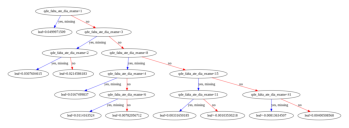

In [42]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [70, 10]
plt.show()

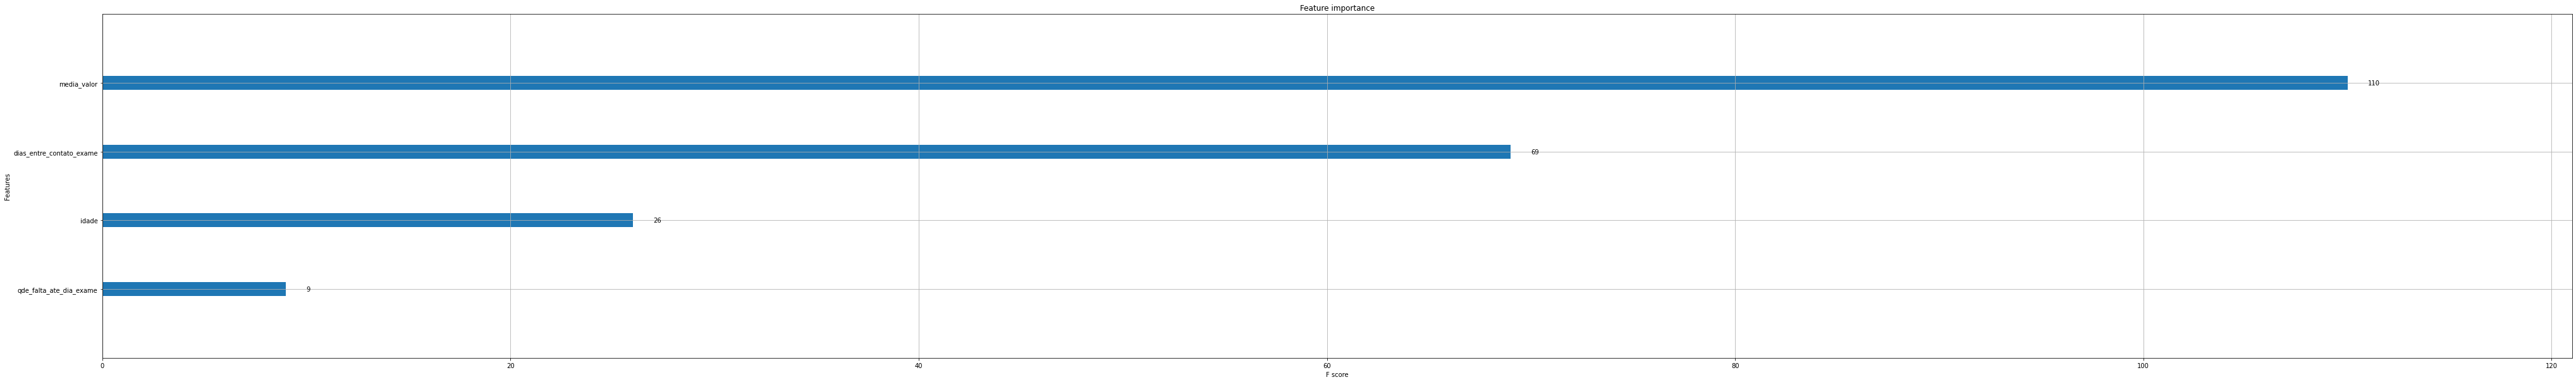

In [49]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

##8.3 modelo Random Forest

In [45]:
from sklearn.preprocessing import StandardScaler


In [46]:
scaler = StandardScaler()

In [51]:
df_transform = scaler.fit_transform(df)

ValueError: ignored

In [52]:
df_transform.mean(axis=1)

NameError: ignored

In [53]:
type(df_transform)

NameError: ignored

In [54]:
df.mean(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0          378198.490406
1          378197.478800
2          378197.474816
3          378197.364010
4          378197.215728
               ...      
1022507    575025.407678
1022508    575030.985859
1022509    575031.840716
1022510    575032.824686
1022511    575033.290223
Length: 1022512, dtype: float64

In [55]:
df

,Unnamed: 0,id_pessoa,dt_exame,media_valor,dias_entre_contato_exame,qde_falta_ate_dia_exame,idade,quarentena,5digcep,show,...,civil_7,sexo_F,sexo_I,sexo_M,forma_CARTÃO ALIANÇA,forma_CONVÊNIOS,forma_HOSPITAL PARCERIA,forma_PARTICULAR,forma_PUBLICO,forma_VENDA PJ E PARCERIAS
0,1,189854805,2019-08-25,796.183679,2,4,28,0,40725,1,...,1,1,0,0,0,1,0,0,0,0
1,4,189854805,2019-10-07,276.357591,11,4,28,0,40725,1,...,1,1,0,0,0,1,0,0,0,0
2,5,189854805,2019-10-17,276.357591,8,4,28,0,40725,1,...,1,1,0,0,0,1,0,0,0,0
3,7,189854805,2019-12-04,214.733267,13,4,28,0,40725,0,...,1,1,0,0,0,1,0,0,0,0
4,8,189854805,2020-06-04,123.295443,27,4,28,1,40725,1,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022507,1380432,287282205,2022-03-31,71.654181,2,0,38,0,41195,1,...,1,1,0,0,0,1,0,0,0,0
1022508,1380440,287284505,2022-03-31,548.901008,2,0,53,0,44800,1,...,1,0,0,1,0,0,0,0,0,1
1022509,1380444,287285405,2022-03-31,71.039203,2,0,56,0,41800,1,...,1,0,0,1,0,1,0,0,0,0
1022510,1380447,287285705,2022-03-31,300.992468,2,0,17,0,41800,1,...,1,0,0,1,0,1,0,0,0,0


In [56]:
y = df['show']
X= df.drop(['show','dt_exame','id_pessoa','5digcep','Unnamed: 0'], axis = 1)

In [57]:
len(df.columns)

504

In [58]:
df.dtypes.head(50)

Unnamed: 0                                                     int64
id_pessoa                                                      int64
dt_exame                                                      object
media_valor                                                  float64
dias_entre_contato_exame                                       int64
qde_falta_ate_dia_exame                                        int64
idade                                                          int64
quarentena                                                     int64
5digcep                                                       object
show                                                           int64
nome_unidade_Delfin - Clínicas e Consultórios - Itaigara       uint8
nome_unidade_Delfin - Feira de Santana                         uint8
nome_unidade_Delfin - Itaigara                                 uint8
nome_unidade_Delfin - Natal                                    uint8
nome_unidade_Delfin - Santo Antôni

In [59]:
import numpy as np

In [60]:
df = df.sample(100000)

In [61]:
df.describe()

,Unnamed: 0,id_pessoa,media_valor,dias_entre_contato_exame,qde_falta_ate_dia_exame,idade,quarentena,show,nome_unidade_Delfin - Clínicas e Consultórios - Itaigara,nome_unidade_Delfin - Feira de Santana,...,civil_7,sexo_F,sexo_I,sexo_M,forma_CARTÃO ALIANÇA,forma_CONVÊNIOS,forma_HOSPITAL PARCERIA,forma_PARTICULAR,forma_PUBLICO,forma_VENDA PJ E PARCERIAS
count,1.000000e+05,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000
mean,6.730688e+05,2.279587e+08,214.981217,8.16645,2.055360,51.213790,0.065320,0.84938,0.000040,0.028280,...,0.921540,0.766790,0.005410,0.227800,0.009250,0.72037,0.000050,0.003410,0.255150,0.01177
std,3.941697e+05,2.552521e+07,199.406020,7.54282,4.824511,18.358911,0.247091,0.35768,0.006324,0.165772,...,0.268895,0.422877,0.073354,0.419415,0.095732,0.44882,0.007071,0.058296,0.435948,0.10785
min,1.100000e+01,1.898548e+08,27.390981,2.00000,0.000000,-914.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,3.333942e+05,2.054645e+08,78.747397,4.00000,0.000000,39.000000,0.000000,1.00000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
50%,6.669580e+05,2.241387e+08,122.280370,6.00000,0.000000,51.000000,0.000000,1.00000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.00000
75%,1.004852e+06,2.471006e+08,300.992468,9.00000,2.000000,65.000000,0.000000,1.00000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.00000
max,1.380430e+06,2.872811e+08,1819.186739,375.00000,351.000000,104.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000


In [65]:
# Labels are the values we want to predict
y = df_transform['show']
# Remove the labels from the features
# axis 1 refers to the columns
X= df.drop(['show','dt_exame','id_pessoa','5digcep','Unnamed: 0'], axis = 1)
# Saving feature names for later use
X_list = list(X.columns)
# Convert to numpy array
X = np.array(X)

NameError: ignored

In [64]:
df = df.drop(['show','dt_exame','id_pessoa','5digcep'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ce4aa84d0>,
      dtype=object)

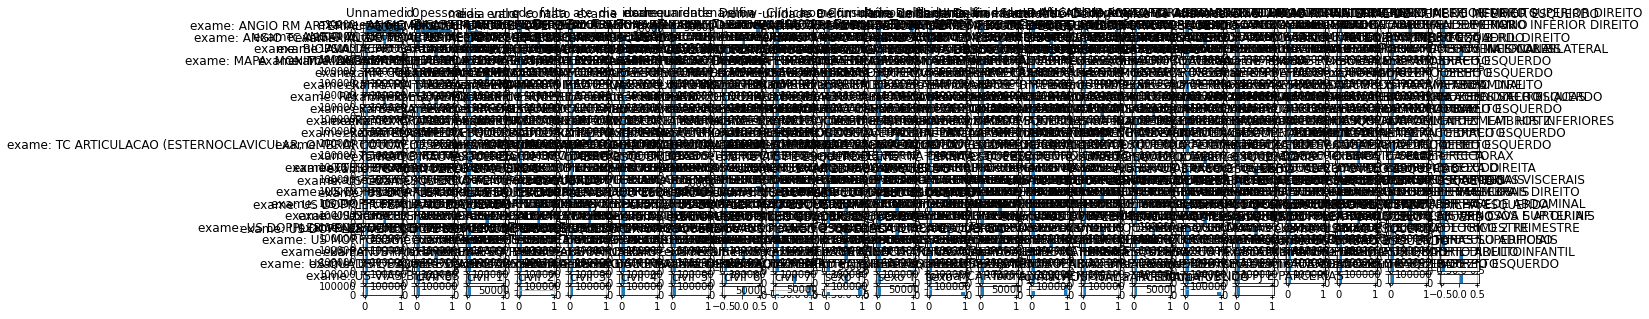

In [63]:
df.hist()

In [62]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [67]:
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

Training X Shape: (766884, 499)
Training y Shape: (766884,)
Testing X Shape: (255628, 499)
Testing y Shape: (255628,)


In [68]:
# The baseline predictions are the historical averages
baseline_preds = test_X[:, X_list.index('qde_falta_ate_dia_exame')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_y)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

NameError: ignored

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_X, train_y);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_X)
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '')


In [66]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

NameError: ignored

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_X, train_y)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
X_importances = [(X, round(importance, 2)) for X, importance in zip(X_list, importances)]
# Sort the feature importances by most important first
X_importances = sorted(X_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in X_importances];

Variable: qde_falta_ate_dia_exame Importance: 0.27
Variable: idade                Importance: 0.12
Variable: Unnamed: 0           Importance: 0.11
Variable: id_pessoa            Importance: 0.09
Variable: dias_entre_contato_exame Importance: 0.09
Variable: media_valor          Importance: 0.06
Variable: quarentena           Importance: 0.01
Variable: nome_unidade_Delfin - Itaigara Importance: 0.01
Variable: nome_unidade_Delfin - Villas do Atlântico Importance: 0.01
Variable: exame: US ABDOMEN TOTAL Importance: 0.01
Variable: exame: US DOPPLER TIREOIDE Importance: 0.01
Variable: exame: US PELVICA TRANSVAGINAL Importance: 0.01
Variable: civil_7              Importance: 0.01
Variable: sexo_F               Importance: 0.01
Variable: sexo_M               Importance: 0.01
Variable: forma_CONVÊNIOS      Importance: 0.01
Variable: forma_PUBLICO        Importance: 0.01
Variable: nome_unidade_Delfin - Clínicas e Consultórios - Itaigara Importance: 0.0
Variable: nome_unidade_Delfin - Feira de San

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [X_list.index('dias_entre_contato_exame'), X_list.index('qde_falta_ate_dia_exame')]
train_important = train_X[:, important_indices]
test_important = test_X[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_y)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_y)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), '')
mape = np.mean(100 * (errors / test_y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
X_values = list(range(len(importances)))
# Make a bar chart
plt.bar(X_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(X_values, X_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');